# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Priesma Putra Reditama
- **Email:** redz71881@gmail.com
- **ID Dicoding:** reditama

## Menentukan Pertanyaan Bisnis



- Pada tanggal apa penyewaan sepeda paling tinggi ?

- Berapa persen peningkatan atau penurunan jumlah pengguna Bike Sharing selama hari kerja dibandingkan dengan akhir pekan setiap 6 bulan ?

## Import Semua Packages/Library yang Digunakan

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




## Data Wrangling

### Gathering Data

In [2]:
day_path = "https://raw.githubusercontent.com/Priesma/Proyek-Analisis-Data---Bike-Sharing-Dataset/refs/heads/main/data/day.csv"
hour_path = "https://raw.githubusercontent.com/Priesma/Proyek-Analisis-Data---Bike-Sharing-Dataset/refs/heads/main/data/hour.csv"

DAY = pd.read_csv(day_path)
JAM = pd.read_csv(hour_path)

# Menampilkan data
DAY.head()
JAM.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Melakukan proses load data csv lalu menampilkan informasi jumlah penyewa sepeda data sebanyak 5 baris

### Assessing Data

In [ ]:
#ASSESSING
DAY.info()
JAM.info()

DAY.isna().sum()
JAM.isna().sum()

print("Jumlah duplikasi: ", DAY.duplicated().sum())
print("Jumlah duplikasi: ", JAM.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Kedua data ini berisi jumlah pengguna sepeda tetapi data kedua memiliki detail tambahan berupa kolom hour yang menunjukkan waktu.
- Data pertama memiliki 731 baris dan data kedua memiliki 17.379 baris.
- adanya pengecekan missing value dan tidak di temukan missing value dan duplicate

### Cleaning Data

In [ ]:
# CLEANING
print(DAY.isnull().sum())
print(JAM.isnull().sum())

DAY.dropna(inplace=True)
JAM.dropna(inplace=True)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
is_weekend    0
month         0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- tidak ada missing values menunjukan data ini baik dari kualitas data
- tidak ada data yang memiliki nilai **null** pada kedua dataset DAY dan JAM karena semua bernilai 0

## Exploratory Data Analysis (EDA)

### Explore ...

In [3]:
day_data = DAY

# Mengubah 'dteday' menjadi format datetime dan menambahkan kolom akhir pekan
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
day_data['weekend'] = day_data['weekday'].isin([5, 6]).astype(int)

# Menentukan hari penyewaan sepeda tertinggi
busiest_day = day_data.loc[day_data['cnt'].idxmax()]
print("Hari Penyewaan Sepeda Paling Tinggi:")
print(f"Tanggal: {busiest_day['dteday'].strftime('%Y-%m-%d')}")
print(f"Jumlah Penyewaan: {busiest_day['cnt']}")

# Analisis penyewaan antara hari kerja dan akhir pekan
day_data['month'] = day_data['dteday'].dt.to_period('6M')
grouped = day_data.groupby(['month', 'weekend'])['cnt'].mean().unstack()

# Menghitung persentase perubahan
grouped['percentage_change'] = ((grouped[0] - grouped[1]) / grouped[1]) * 100
print("\nRata-rata Penyewaan per 6 bulan:")
print(grouped)

# Perhitungan persentase perubahan total
percentage_change_total = ((day_data[day_data['weekend'] == 0]['cnt'].mean() -
                             day_data[day_data['weekend'] == 1]['cnt'].mean()) /
                            day_data[day_data['weekend'] == 1]['cnt'].mean()) * 100

print(f"\nPersentase perubahan: {percentage_change_total:.2f}%")



Hari Penyewaan Sepeda Paling Tinggi:
Tanggal: 2012-09-15
Jumlah Penyewaan: 8714

Rata-rata Penyewaan per 6 bulan:
weekend            0            1  percentage_change
month                                               
2011-01  1239.863636  1212.444444           2.261480
2011-02  1714.600000  1740.375000          -1.481003
2011-03  1950.130435  2399.000000         -18.710695
2011-04  3345.900000  2795.200000          19.701631
2011-05  4296.782609  4624.375000          -7.084036
2011-06  4688.636364  5045.250000          -7.068305
2011-07  4525.238095  4631.100000          -2.285891
2011-08  4493.739130  4166.875000           7.844347
2011-09  4144.142857  4487.888889          -7.659415
2011-10  4038.227273  3852.222222           4.828513
2011-11  3356.590909  3540.250000          -5.187744
2011-12  2759.000000  2938.400000          -6.105363
2012-01  3064.130435  3283.625000          -6.684520
2012-02  3593.476190  3459.250000           3.880211
2012-03  5394.571429  5158.900000     

**Insight:**
- Dari analisa data diatas penyewaan tertinggi pada tanggal 2012-09-15 dengan jumlah penyewaan 8714
- presentase penywaan per 6 bulan sekali yaitu -3.51%

## Visualization & Explanatory Analysis

### Pertanyaan 1:

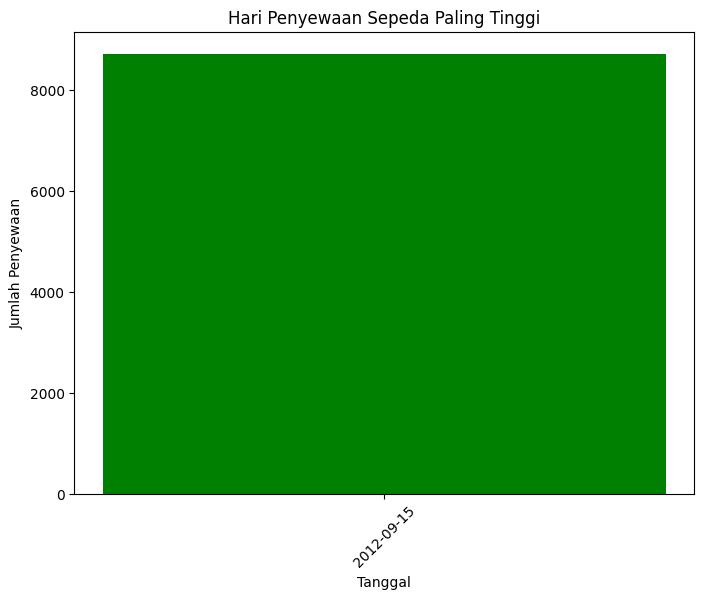

Hari Penyewaan Sepeda Paling Tinggi:
Tanggal: 2012-09-15
Jumlah Penyewaan: 8714


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

day_data =DAY

day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Menghitung hari penyewaan sepeda tertinggi
busiest_day = day_data.loc[day_data['cnt'].idxmax()]

# Visualisasi hari penyewaan sepeda tertinggi
plt.figure(figsize=(8, 6))
plt.bar(busiest_day['dteday'].strftime('%Y-%m-%d'), busiest_day['cnt'], color='green')
plt.title('Hari Penyewaan Sepeda Paling Tinggi')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

print("Hari Penyewaan Sepeda Paling Tinggi:")
print(f"Tanggal: {busiest_day['dteday'].strftime('%Y-%m-%d')}")
print(f"Jumlah Penyewaan: {busiest_day['cnt']}")


### Pertanyaan 2:

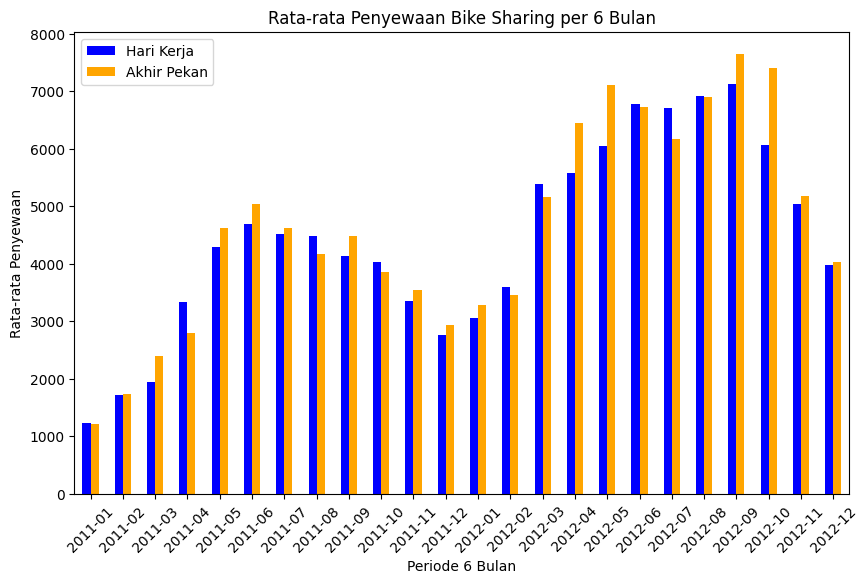

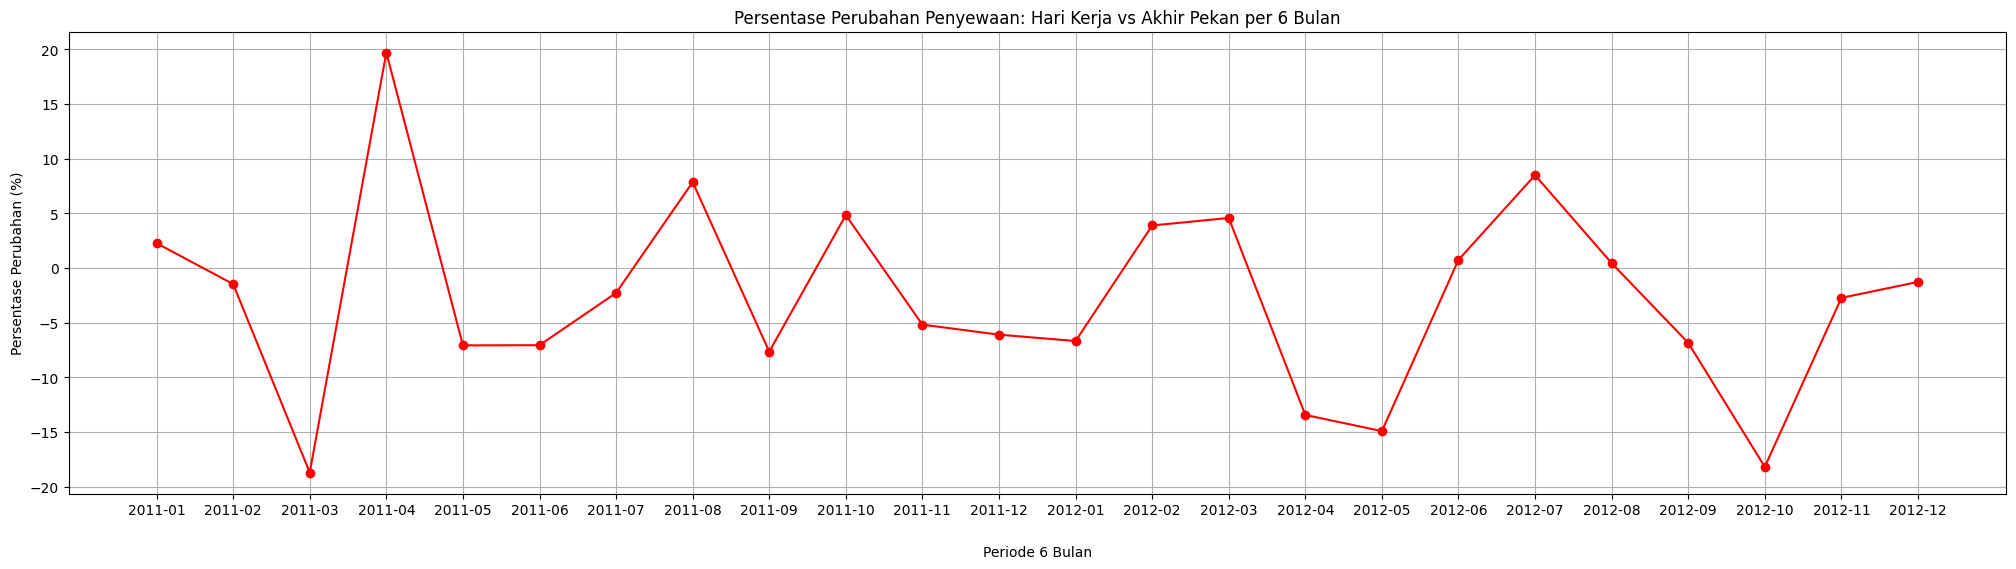

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


day_data = DAY
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Visualisasi perbandingan penyewaan selama hari kerja dan akhir pekan
grouped[[0, 1]].plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Rata-rata Penyewaan Bike Sharing per 6 Bulan')
plt.xlabel('Periode 6 Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=45)
plt.legend(['Hari Kerja', 'Akhir Pekan'])
plt.show()

# Visualisasi persentase perubahan antara hari kerja dan akhir pekan
plt.figure(figsize=(25, 6))  # Lebar diperbesar agar lebih terlihat
plt.plot(grouped.index.astype(str), grouped['percentage_change'], marker='o', color='red')
plt.title('Persentase Perubahan Penyewaan: Hari Kerja vs Akhir Pekan per 6 Bulan')
plt.xlabel('Periode 6 Bulan', labelpad=20)  # Menambah jarak label x dengan plot
plt.ylabel('Persentase Perubahan (%)')
plt.grid(True)
plt.show()


**Insight:**
- Pada grafik pertama, terlihat bahwa tanggal 15 September 2012 merupakan hari dengan jumlah penyewaan sepeda tertinggi, yaitu sebanyak 8,714 penyewaan.
- Dari bar chart penyhewaan per 6 bulan, penyewaan sepeda cenderung lebih tinggi pada akhir pekan dibandingkan dengan hari kerja.
- Dari line chart yang menunjukkan persentase perubahan, adanya fluktuasi dalam perubahan penggunaan sepeda antara hari kerja dan akhir pekan setiap 6 bulan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Penyewaan sepeda tertinggi terjadi pada tanggal 15 September 2012, dengan total 8,714 penyewaan. Puncak penyewaan ini mungkin dipengaruhi oleh berbagai faktor seperti cuaca yang baik, hari khusus, atau liburan. Hal ini menunjukkan bahwa penyewaan sepeda dapat sangat dipengaruhi oleh faktor tertentu yang mendorong lebih banyak orang untuk menggunakan sepeda.
- Rata-rata penyewaan sepeda selama hari kerja cenderung lebih rendah dibandingkan akhir pekan, dengan persentase sekitar 3.51%. dalam visualisasi menunjukkan bahwa penyewaan sepeda lebih banyak terjadi pada akhir pekan, dengan orang yang menyewa lebih cenderung melakukan aktivitas rekreasi saat mereka memiliki lebih banyak waktu luang seperti penyewaan sepeda ini.